In [1]:
using PlotRecipes
pyplot(size=(500,500))
theme(:dark)

In [13]:
# some common attr
kw = KW(
    :method=>:tree,
    :fontsize=>10,
:lc => cgrad([:white,:green]),
    :w => 2,
    :root => :bottom,
    :shorten => .1,
:ms => 2,
);


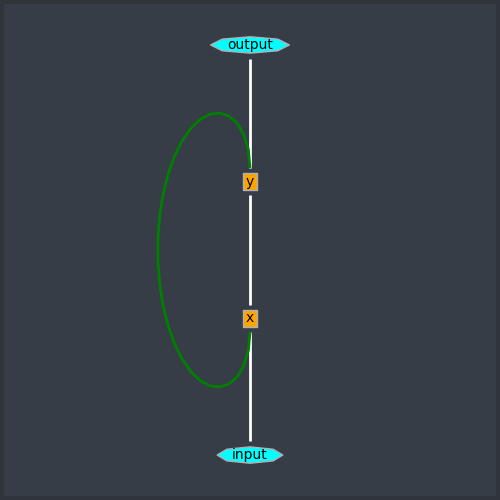

In [17]:
m = 4
source = vcat(1:m-1, 3)
destiny = vcat(2:m, 2)
weight = vcat(zeros(m-1),1)
labs = ["input","x","y","output"]
shapes = [:oct,:rect,:rect,:oct]
mc = [:cyan,:orange,:orange,:cyan]

# We create a recurrent network, where the feedforward network
#    I --> t1 --> z --> t2 --> O
# is augmented with a recurrent connection from z --> t1.
graphplot(
    source, destiny, weight;
    names=labs, shape=shapes, mc=mc,
    x=zeros(m), y=1.:m,
    kw...
)


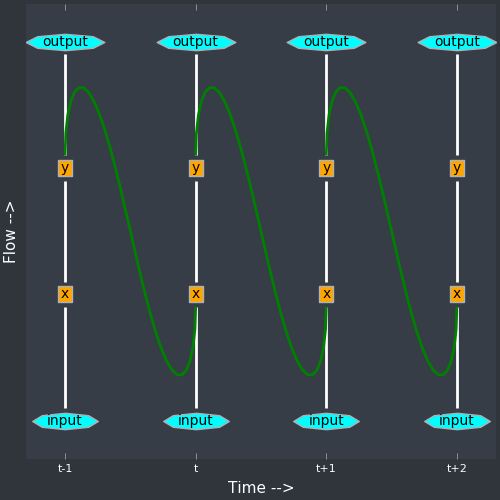

In [19]:
n = 4
sforw = vec(reshape(1:n*m,m,n)[1:m-1,:])
srecur = 3:m:m*(n-1)
source = vcat(sforw, srecur)
destiny = vcat(sforw+1, srecur+(m-1))
weight = vcat(zeros(length(sforw)), ones(length(srecur)))

# We now unroll that network for timesteps around t
graphplot(source, destiny, weight;
    shape=repmat(shapes,n),
    names=repmat(labs,n),
    mc = repmat(mc,n),
    x = vec(repmat(1.:n,1,m)'),
    y = vec(repmat(1.:m,1,n)),
    xticks=(1:4,["t-1","t","t+1","t+2"]),
    xguide="Time -->",
    yguide="Flow -->",
    kw...
)